# 求取数据的主成分PCA

In [82]:
import numpy as np
import matplotlib.pyplot as plt

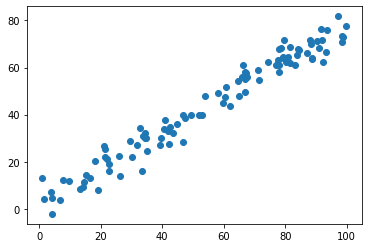

In [83]:
# 随机生成一组二维特征数据
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,5,size=100)
plt.scatter(X[:,0],X[:,1])
plt.show()

-  进行demean操作，即将数据进行中心化

In [84]:
def demean(X):
    return X - np.mean(X,axis=0)

- 使用梯度上升法求PCA

In [85]:
# 计算函数的值
def f(w,X):
    return np.sum(X.dot(w)**2)/len(X)
# 使用公式法计算梯度
def df_math(w,X):
    return X.T.dot(X.dot(w))*(2/len(X))
# 使用模拟法计算梯度
def df_debug(w,X,epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w1 = np.copy(w)
        w1[i] += epsilon
        w2 = np.copy(w)
        w2[i] -= epsilon
        res[i] = (f(w1,X) - f(w2,X)) / (2 * epsilon)
    return res
# 计算单位向量
def direction(w):
    return w / np.linalg.norm(w)
# 梯度上升
def gradient_descent(initial_w, X,eta,n_iters,df = df_math):
    w = direction(initial_w)
    for i in range(n_iters):
        gradient = df(w,X)
        w = w + eta * gradient
        w = direction(w)
    return w

- 对数据求解PCA

In [88]:
X_demean = demean(X)
initial_w = np.random.uniform(size=X.shape[1])
w_ = gradient_descent(initial_w,X_demean,0.0001,10000)
print(w_)

[0.79397826 0.60794615]


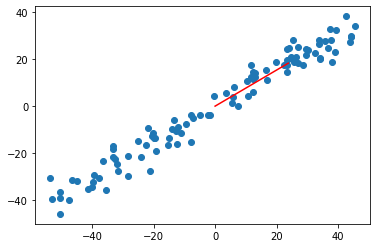

In [89]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w_[0]*30],[0,w_[1]*30],color='r')
plt.show()